# Introduction to Python

## Part III: Visualization with open data


This document is heavily based on the Python-Novice-Gapminder lesson developed by Software Carpentry, and the original lesson can be found online at http://swcarpentry.github.io/python-novice-gapminder/



In [3]:
import pandas
oceania_data = pandas.read_csv('data/gapminder_gdp_oceania.csv')

We're calling the `read_csv` function in the `pandas` library. Right now we're giving it one text argument which is the file path to the file we're reading in. If you go back to the file manager view of Jupyter you'll see a folder called `data`, which is containing several files, one of which is `gapminder_gdp_oceania.csv`.

In [4]:
oceania_data

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
1,New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Jupyter is clever enough to recognize this data is a table and display it to us in a table format. We see here that we first start with a column called `country`, and then proceeed to have GDP measurements over many years. Each row of this dataset currently has a name, which is just '0' or '1'. In many cases we'd like to specify that the names of the rows are denoted by the `country` column. We can do that in the `read_csv` function by specifying the `index_col` parameter. 

Note here that this is the first time we've called a function or method with a *named* parameter; this is extremely useful when a function or method might have dozens of default parameters and we want to change just one, in which case we don't have to list through all the other parameters in the exact right order.

In [5]:
oceania_data = pandas.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
oceania_data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Now we see that the country column is used to set the row names. 

There are a lot of things available on pandas dataframes to use.

## Selecting Values in Pandas DataFrames

Remember with lists how we could use square brackets to select specific values? We can (mostly) do the same thing with DataFrames, but there are two ways to do it.

In [6]:
# Just loading a larger dataset first
europe_data = pandas.read_csv('data/gapminder_gdp_europe.csv', index_col='country')

## Plotting

For plotting we use the `matplotlib` library.

In [7]:
import matplotlib.pyplot as plt
# see our use of aliasing so that we won't have to type matplotlib.pyplot over and over again

Here's a simple example with two sets of points

Text(0.5, 1.0, 'Distance Plot')

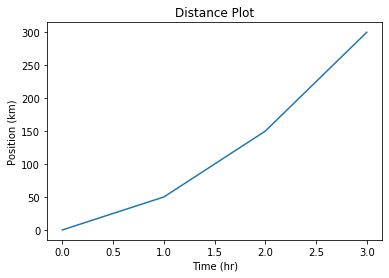

In [8]:
time = [0, 1, 2, 3]
position = [0, 50, 150, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.title('Distance Plot')

You can imagine we might want to plot data from our dataframe. Let's extract the years from the column names first. Just a reminder that we can access the column names using `oceania_data.columns`.

In [9]:
print(type(oceania_data.columns))
print(oceania_data.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')


In [10]:
# Taking the last 4 characters from the string
# Also note that we're using the shortcut way of working with each value in a list.
years_str = [x[(len(x)-4):] for x in oceania_data.columns]
years_str # close; now we want it to be numeric

['1952',
 '1957',
 '1962',
 '1967',
 '1972',
 '1977',
 '1982',
 '1987',
 '1992',
 '1997',
 '2002',
 '2007']

In [11]:
years_int = [int(x) for x in years_str]
years_int

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

Text(0.5, 1.0, 'GDP Per Capita of Australia')

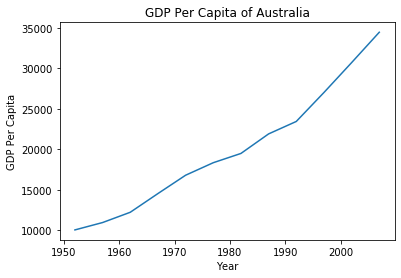

In [12]:
# Plot Australia's GDP
plt.plot(years_int, oceania_data.loc['Australia', :])
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita of Australia')

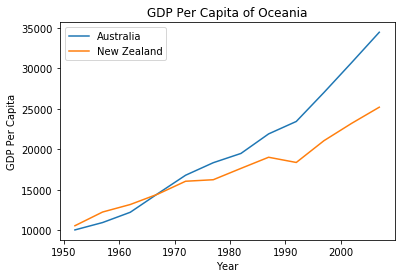

In [13]:
# We can plot both Australia and New Zealand, but we have to transform the data so that the columns are countries
lines = plt.plot(years_int, oceania_data.T)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita of Oceania')

plt.legend(lines, ['Australia', 'New Zealand'])

It turns out that `pandas` dataframes have plot functionality built into them directly that will handle labels for you. However we'll want to first replace the column names with the actual year values.

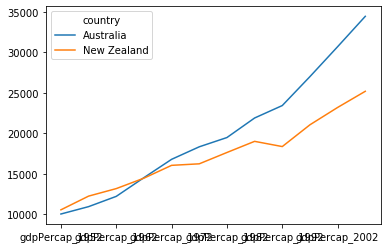

In [14]:
# First what happens if we don't replace the columns
oceania_data.T.plot()

It tries to plot the column labels, equally spaced, which is seldom what we want.

Text(0, 0.5, 'GDP Per Capita')

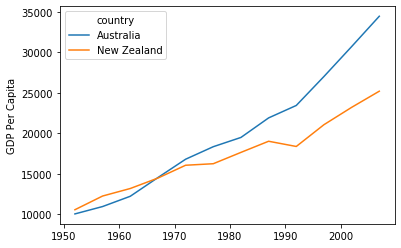

In [15]:
oceania_data.columns = years_int # we change the actual column names
oceania_data.T.plot()

# we can still set axis values if we want
plt.ylabel('GDP Per Capita')

We can also still plot individual countries as well like before.

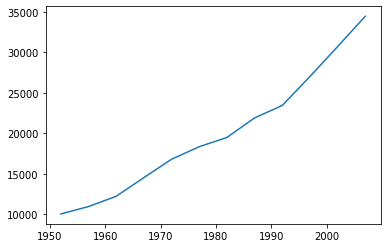

In [16]:
oceania_data.loc['Australia', :].plot()

You can change the types of plots by specifying `kind`.

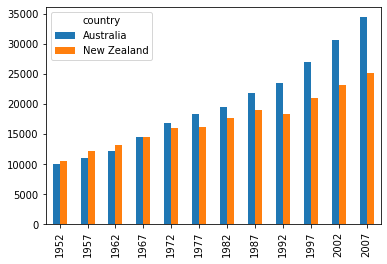

In [17]:
oceania_data.T.plot(kind='bar')

We can also make scatter plots easily. Suppose we want to plot Australia's GDP versus New Zealand's GDP.

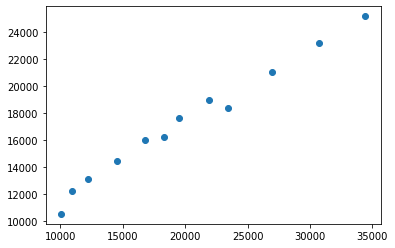

In [18]:
# Using matplotlib directly
australia_gdp = oceania_data.loc['Australia', :]
new_zealand_gdp = oceania_data.loc['New Zealand', :]

plt.scatter(australia_gdp, new_zealand_gdp)

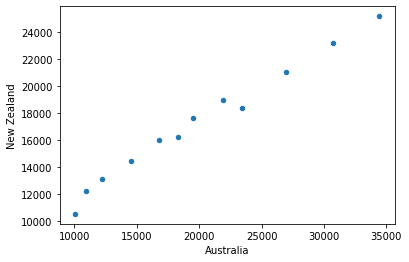

In [19]:
# Here we can call scatter from the dataframe directly, specifying the two columns (remember we took the transpose)
oceania_data.T.plot.scatter(x='Australia', y='New Zealand')

### Practice

* Using the dataframe you created last practice of the percent gdp change, plot the change in GDP for at least 3 countries of your choice. Remember to convert the columns to numeric years that can be plotted. If you weren't able to create that dataframe last practice, then use `europe_relative_data` instead.
* Make sure your plot has an x-label, a y-label, a title, and a legend.